# 1000 Movies Data (EDA)

### Problem statement

__"Movies revenue influencers for 2006-2016"__   

### Data source and dataset

The notebook explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ which includes, __cleaning, munging, reshaping, slicing and transforming data__ for analysis. The observations with each step helps us draw conclusions from the data.

__Name__: "1000 movies data"
__Source__: IMDB
__Year__: 2017
__Description__: Dataset contains 1000 most popular movies on IMDB between 2006 and 2016. Below is the table showing all the __1000 movies__ and __12 columns__ with description.

| Column Name       | Description                                                  |
| -------------     |:-------------                                               :| 
| Rank              | Movie rank order                                             | 
| Title             | The title of the film                                        |  
| Genre             | A comma-separated list of genres used to classify the film   | 
| Description       | Brief one-sentence movie summary                             |   
| Director          | The name of the film's director                              |
| Actors            | A comma-separated list of the main stars of the film         |
| Year              | The year that the film released as an integer.               |
| Runtime (Minutes) | The duration of the film in minutes.                         |
| Rating            | User rating for the movie 0-10                               |
| Votes             | Number of votes                                              |
| Revenue (Millions)| Movie revenue in millions                                    |
| Metascore         | An aggregated average of critic scores. Values are           |
| Metascore         | between 0 and 100. Higher scores represent positive reviews. |

### Load packages and data

In [1]:
import numpy as np                                            # Implemennts milti-dimensional array and matrices
import pandas as pd                                           # For data manipulation and analysis
import pandas_profiling
import matplotlib.pyplot as plt                               # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns                                         # Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline

In [2]:
#Importing dataset using pd.read_csv
movds = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-1/master/Data/Projects/1000%20movies%20data.csv')
movds.head()                           #Gives the first five rows of the dataframe

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


### Data Profiling

Review the shape, datatypes and sample data to understand what variables we are dealing with.  The variables need to be transformed before the analysing them. 

In [3]:
movds.shape                 #Gives the number of rows and columns in the dataframe

(1000, 12)

In [4]:
movds.info()               #Gives index, datatype and memory info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
Rank                  1000 non-null int64
Title                 1000 non-null object
Genre                 1000 non-null object
Description           1000 non-null object
Director              1000 non-null object
Actors                1000 non-null object
Year                  1000 non-null int64
Runtime (Minutes)     1000 non-null int64
Rating                1000 non-null float64
Votes                 1000 non-null int64
Revenue (Millions)    872 non-null float64
Metascore             936 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.8+ KB


In [6]:
movds.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,872.000000,936.000000
mean,500.500000,2012.783000,113.172000,6.723200,1.698083e+05,82.956376,58.985043
std,288.819436,3.205962,18.810908,0.945429,1.887626e+05,103.253540,17.194757
min,1.000000,2006.000000,66.000000,1.900000,6.100000e+01,0.000000,11.000000
25%,250.750000,2010.000000,100.000000,6.200000,3.630900e+04,13.270000,47.000000
50%,500.500000,2014.000000,111.000000,6.800000,1.107990e+05,47.985000,59.500000
75%,750.250000,2016.000000,123.000000,7.400000,2.399098e+05,113.715000,72.000000
max,1000.000000,2016.000000,191.000000,9.000000,1.791916e+06,936.630000,100.000000


In [7]:
movds.isnull().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [8]:
profile = pandas_profiling.ProfileReport(movds)
profile.to_file()

#### Observations

__Metascore__ has __64 / 6.4% missing__ values 
__Revenue (Millions)__ has __128 / 12.8% missing__ values 
__Genre__ has a high cardinality: __207 distinct__ values

In [9]:
movds.columns = map(str.lower, movds.columns)   # map() function returns a list of results after applying the given function to each item of a given iterable.
movds.dtypes                                    # Confirm that all variable names are now lower case

rank                    int64
title                  object
genre                  object
description            object
director               object
actors                 object
year                    int64
runtime (minutes)       int64
rating                float64
votes                   int64
revenue (millions)    float64
metascore             float64
dtype: object

In [10]:
#Renames column rating to imdb rating for better understanding
nmovds = movds.rename(columns = {'rating' : 'imdb_rating','revenue (millions)':'revenue_millions',
                                 'runtime (minutes)':'runtime_minutes'},inplace=False)
#Checking the updated column name 
nmovds.head(2)

,rank,title,genre,description,director,actors,year,runtime_minutes,imdb_rating,votes,revenue_millions,metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0


### Metascore

In [11]:
print('mean:',nmovds.metascore.mean())
print('median:',nmovds.metascore.median())
print('mode:',nmovds.metascore.mode())

mean: 58.98504273504273
median: 59.5
mode: 0    66.0
1    68.0
2    72.0
dtype: float64


In [12]:
#missing metascore fields are filled with the mean
nmovds.metascore = nmovds.metascore.fillna(nmovds['metascore'].mean())

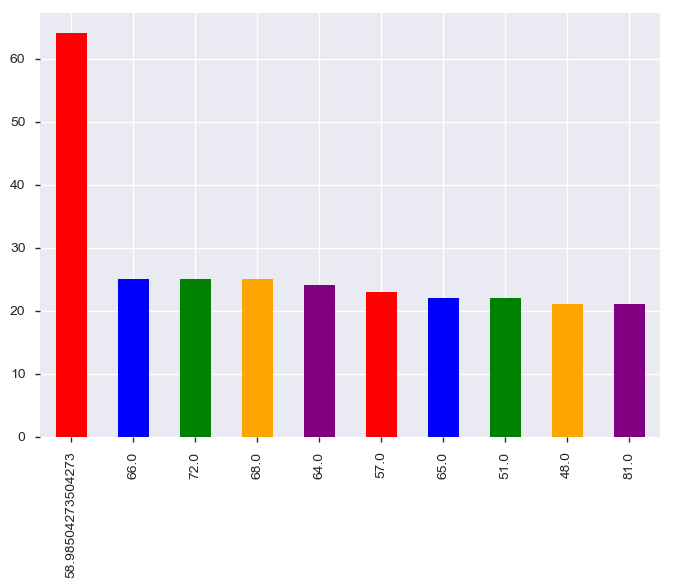

In [13]:
nmovds['metascore'].value_counts().head(10).plot.bar(color=['red','blue','green','orange','purple'])

In [14]:
nmovds.drop('metascore',axis=1,inplace=True)                #Dropping metascore column

Metascore has 64 missing values.  Missing fileds are with the mean. This resulted in metascore being not evenly distributed.  Considering the total number of movies, Dropping 64 will not help the analysis yeild the correct conclusions.  So dropping the metascore column. 

### Revenue

In [15]:
#missing revenue fields are filled with the median 
nmovds.revenue_millions = nmovds.revenue_millions.fillna(nmovds['revenue_millions'].median())

### Grouping the genre

Genre has got 207 distinct values.  Genre is one of the major parameters for the analysis and the high cardinality will make things difficult.  So categorising the genre into 6 maingenre.

In [16]:
print("Count of distint Genre:", len(set(nmovds['genre'])))      # Learn more about the variable Gender, which appears not to be standardized with 49 distinct responses.
print("Distinct responses for Genre:", set(nmovds['genre']))                    

Count of distint Genre: 207
Distinct responses for Genre: {'Action,Adventure,Drama', 'Comedy', 'Action,Adventure,Crime', 'Comedy,Drama,Romance', 'Drama,Thriller', 'Drama,Romance', 'Adventure,Comedy,Romance', 'Drama,Family', 'Action,Crime,Fantasy', 'Action,Drama,Family', 'Action,Crime,Thriller', 'Drama,Fantasy,Horror', 'Adventure,Mystery,Sci-Fi', 'Action,Mystery,Thriller', 'Drama,Romance,Thriller', 'Action,Mystery,Sci-Fi', 'Action,Comedy,Fantasy', 'Crime,Mystery,Thriller', 'Drama,Sci-Fi,Thriller', 'Drama,Sport', 'Action,Comedy,Drama', 'Crime,Drama,Thriller', 'Action,Crime,Mystery', 'Crime,Drama,Music', 'Adventure,Comedy,Sci-Fi', 'Action,Adventure,Sci-Fi', 'Drama,Horror', 'Mystery,Thriller', 'Action,Horror,Romance', 'Animation,Family,Fantasy', 'Adventure,Family,Fantasy', 'Action,Sci-Fi', 'Sci-Fi,Thriller', 'Comedy,Horror,Romance', 'Action,Adventure,Biography', 'Drama', 'Fantasy,Horror,Thriller', 'Adventure,Comedy,Drama', 'Drama,Romance,War', 'Comedy,Sci-Fi', 'Comedy,Horror,Sci-Fi', 'Come

In [17]:
#clean 'Genre'

#Select unique elements
nmovds['maingenre'] = nmovds['genre']

#Make genre groups
#Genre comedy,romance,family,drama and music are named Romance
Romance = ['Comedy,Family,Musical','Drama,Romance,War','Drama,Musical,Romance','Adventure,Comedy,Family','Comedy,Drama,Musical','Comedy','Comedy,Family',  
'Adventure,Comedy,Drama', 'Drama,Music,Romance', 'Drama,Romance', 'Drama,Music', 'Comedy,Music', 'Drama,Family', 'Drama', 'Comedy,Romance','Comedy,Drama,Family', 
'Adventure,Drama,Family', 'Adventure,Drama,Romance', 'Comedy,Music,Romance','Comedy,Drama','Adventure,Comedy,Romance','Comedy,Horror,Romance','Action,Comedy,Family', 
'Action,Drama,Family','Comedy,Romance,Western','Drama,Family,Fantasy', 'Comedy,Family,Fantasy', 'Comedy,Drama,Music','Comedy,Drama,Romance', 
'Action,Comedy,Drama','Comedy,Romance,Sport','Comedy,Drama,Thriller','Drama,Family,Music','Action,Comedy,Romance','Comedy,Family,Romance',]

#Genre action, adventure and war are named Action
Action = ['Action,Comedy,Sport','Adventure,Drama','Action,Fantasy','Action,Drama,Romance','Action,Comedy', 'Adventure,Comedy,Fantasy','Action,Adventure,Comedy', 
'Adventure', 'Drama,Sport', 'Adventure,Family', 'Action,Adventure',  'Drama,Thriller','Action,Adventure,Romance', 'Action,Adventure,Drama',  
'Adventure,Comedy','Action,Drama,Thriller','Drama,Thriller,War', 'Action,Thriller,War','Adventure,Drama,Thriller','Drama,Romance,Thriller','Thriller,War','Action,Thriller','Action,Adventure,Thriller','Drama,War','Adventure,Drama,War','Action,Adventure,Family','Action,Drama,Sport','Action', 'Action,Drama,War','Action,Adventure,Fantasy']

#Genre crime, horror, mystry and thriller are named Horror
Horror = ['Comedy,Horror,Thriller','Action,Drama,Mystery','Drama,Horror,Musical','Action,Comedy,Crime','Comedy,Crime,Thriller','Comedy,Crime','Horror','Fantasy,Mystery,Thriller','Horror,Mystery', 'Mystery,Romance,Thriller', 'Drama,Horror', 'Crime,Mystery,Thriller', 'Crime,Thriller', 'Action,Adventure,Horror', 'Action,Drama,Horror',
'Crime,Drama,Mystery', 'Action,Crime,Drama', 'Drama,Horror,Mystery','Crime,Drama,Thriller','Action,Crime,Sport', 'Adventure,Horror', 'Crime,Drama,Horror', 
'Drama,Mystery,Romance', 'Action,Adventure,Crime',  'Adventure,Horror,Mystery', 'Adventure,Drama,Horror', 'Action,Comedy,Horror', 'Mystery,Thriller','Thriller', 
'Crime,Drama,Music',  'Comedy,Crime,Drama', 'Drama,Mystery,Thriller', 'Drama,Mystery,War',
'Mystery,Thriller,Western','Drama,Horror,Thriller','Crime,Drama','Action,Horror,Mystery','Comedy,Horror','Comedy,Drama,Horror','Crime,Horror,Thriller', 
'Action,Mystery,Thriller', 'Action,Horror,Thriller','Adventure,Crime,Mystery','Action,Crime,Thriller','Action,Horror,Romance','Horror,Mystery,Thriller','Action,Crime,Mystery','Comedy,Mystery', 
'Horror,Thriller', 'Action,Horror','Action,Comedy,Mystery', 'Action,Crime,Fantasy','Adventure,Comedy,Horror','Action,Adventure,Mystery']

#Genre biograpy, history and western are named History
History= ['Biography,Drama,History','Biography,Drama,Sport','Adventure,Biography','Adventure,Biography,Crime','Crime,Drama,History','Biography,Drama,Romance','Biography,Crime,Drama','Action,Adventure,Biography','Biography,Drama','Adventure,Biography,Drama','Action,Biography,Drama','Biography,History,Thriller','Biography,Drama,Family','Biography,Drama,Mystery','Biography,Comedy,Drama','Action,Biography,Crime','Biography,Comedy,Crime','Biography,Drama,Thriller', 'Drama,History,War','Comedy,Western','Drama,History','Action,Adventure,Western', 'Adventure,Drama,Western', 'Action,Drama,History','Adventure,Drama,History','Drama,History,Thriller','Drama,Western']

Animation = ['Animation,Adventure,Family','Animation,Fantasy','Animation,Comedy,Drama','Animation,Comedy,Family','Animation,Family,Fantasy','Animation,Drama,Romance','Animation,Action,Comedy','Animation,Action,Adventure','Animation,Drama,Fantasy','Animation,Adventure,Comedy']

#Genre Science fiction and fantasy are named SciFi
SciFi = ['Sci-Fi','Drama,Horror,Sci-Fi','Drama,Sci-Fi','Comedy,Horror,Sci-Fi','Adventure,Drama,Fantasy', 'Drama,Fantasy,Horror', 'Comedy,Fantasy,Horror','Romance,Sci-Fi,Thriller','Action,Sci-Fi','Action,Sci-Fi,Thriller','Adventure,Mystery,Sci-Fi', 'Action,Adventure,Sci-Fi','Action,Crime,Sci-Fi','Mystery,Romance,Sci-Fi','Horror,Mystery,Sci-Fi','Action,Horror,Sci-Fi','Adventure,Drama,Sci-Fi','Drama,Romance,Sci-Fi','Sci-Fi,Thriller','Comedy,Sci-Fi','Horror,Sci-Fi,Thriller','Adventure,Comedy,Sci-Fi','Action,Drama,Sci-Fi','Drama,Sci-Fi,Thriller','Romance,Sci-Fi','Drama,Mystery,Sci-Fi','Mystery,Sci-Fi,Thriller','Adventure,Sci-Fi,Thriller','Action,Mystery,Sci-Fi','Action,Comedy,Sci-Fi','Adventure,Fantasy,Mystery',
'Action,Fantasy,Horror','Action,Drama,Fantasy','Drama,Fantasy,Thriller','Action,Fantasy,Thriller','Fantasy,Horror,Thriller','Adventure,Family,Fantasy',
'Comedy,Fantasy,Romance','Drama,Fantasy,Mystery','Drama,Fantasy',
'Action,Fantasy,War','Action,Comedy,Fantasy','Drama,Fantasy,Musical','Adventure,Fantasy','Crime,Drama,Fantasy','Drama,Fantasy,War','Comedy,Fantasy', 'Fantasy,Horror','Comedy,Drama,Fantasy','Drama,Fantasy,Romance','Drama,Fantasy,Music']

for (row, col) in nmovds.iterrows():

    if (col.maingenre) in Romance:
        nmovds['maingenre'].replace(to_replace=col.genre, value='Romance', inplace=True)

    if (col.maingenre) in Action:
        nmovds['maingenre'].replace(to_replace=col.genre, value='Action', inplace=True)
    
    if (col.maingenre) in Horror:
        nmovds['maingenre'].replace(to_replace=col.genre, value='Horror', inplace=True)
        
    if (col.maingenre) in History:
        nmovds['maingenre'].replace(to_replace=col.genre, value='History', inplace=True)
    
    if (col.maingenre) in Animation:
        nmovds['maingenre'].replace(to_replace=col.genre, value='Animation', inplace=True)
        
    if (col.maingenre) in SciFi:
        nmovds['maingenre'].replace(to_replace=col.genre, value='SciFi', inplace=True)
        
#Gives the unique genre
print(nmovds['maingenre'].unique())

['SciFi' 'Horror' 'Animation' 'Action' 'Romance' 'History']


In [18]:
#Profile check after data cleaning
profile = pandas_profiling.ProfileReport(nmovds)
profile.to_file()

In [19]:
print('Movie count based on the genre')
nmovds['maingenre'].value_counts()

Movie count based on the genre


Horror       260
Romance      257
SciFi        185
Action       149
History      100
Animation     49
Name: maingenre, dtype: int64

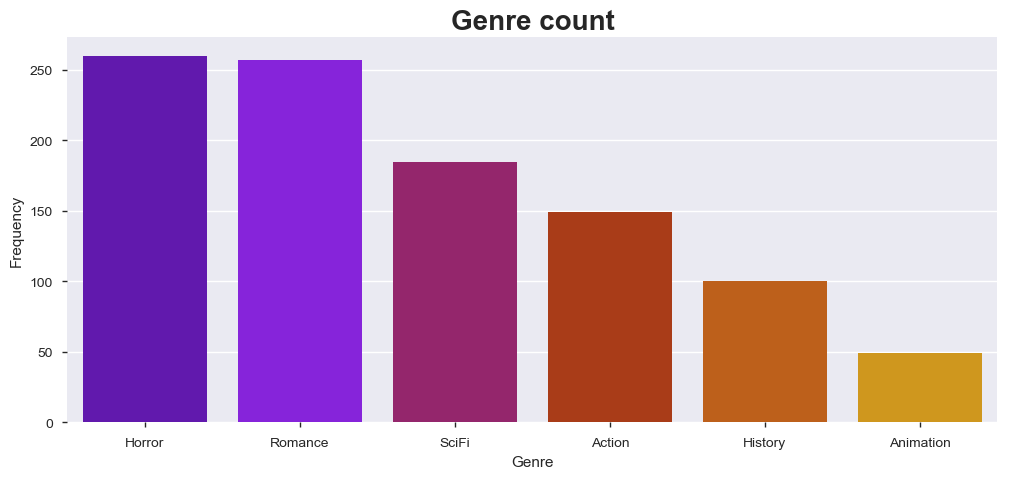

In [20]:
plt.figure(figsize=(12,5))
sns.countplot('maingenre',data = nmovds, order = nmovds['maingenre'].value_counts().index,palette="gnuplot")
plt.title("Genre count",fontsize=20,fontweight="bold")
plt.ylabel("Frequency")
plt.xlabel("Genre")
plt.show()

__Horror__ has got the __highest__ number of movies followed by __Romance and SciFi__.
__Animation__ is with the __least__ number of movies.

### Revenue distribution and categorisation

Text(0.5, 1.0, 'Revenue distribution using FacetGrid')

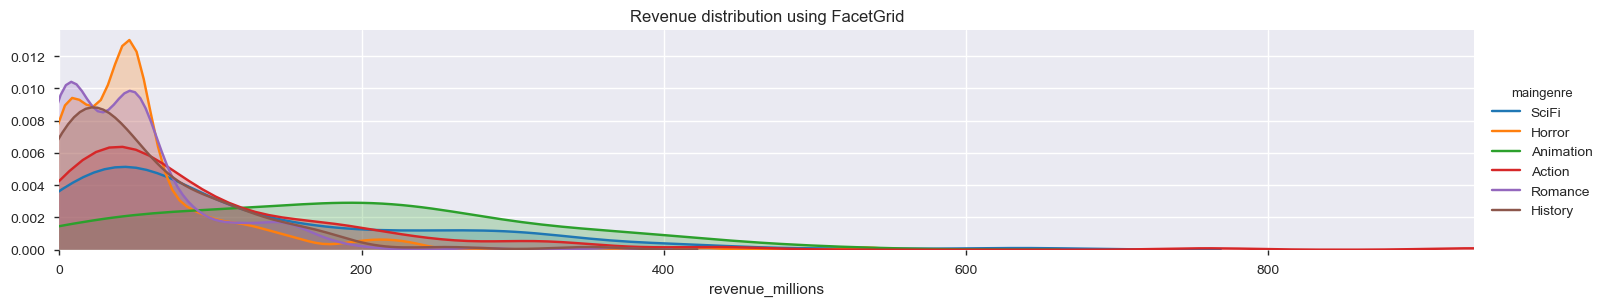

In [21]:
as_fig = sns.FacetGrid(nmovds,hue='maingenre',aspect=5)

as_fig.map(sns.kdeplot,'revenue_millions',shade=True)

oldest = nmovds['revenue_millions'].max()

as_fig.set(xlim=(0,oldest))

as_fig.add_legend()
plt.title('Revenue distribution using FacetGrid')

In [22]:
#How many movies have got revenue more than 250M?
nmovds[nmovds['revenue_millions']>260].count()

rank                56
title               56
genre               56
description         56
director            56
actors              56
year                56
runtime_minutes     56
imdb_rating         56
votes               56
revenue_millions    56
maingenre           56
dtype: int64

Due to some outliers (only a few movies have got high revenue), Revenue is __highly skewed__ .  __Majority__ of the movies fall under __260M__. For the better analysis we are going to bucketize the revenue into __5 groups__.

In [23]:
#Categorise the revenue into buckets for better understanding 
nmovds['revenue_cat'] = pd.cut(nmovds['revenue_millions'].dropna(),
                               [0,65.00,130.00,195.00,260.00,1000.00],
                               labels=['<65','65-129','130-194','195-259','260+'],include_lowest=True)
nmovds.tail(2)

,rank,title,genre,description,director,actors,year,runtime_minutes,imdb_rating,votes,revenue_millions,maingenre,revenue_cat
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,47.985,Action,<65
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.640,Romance,<65


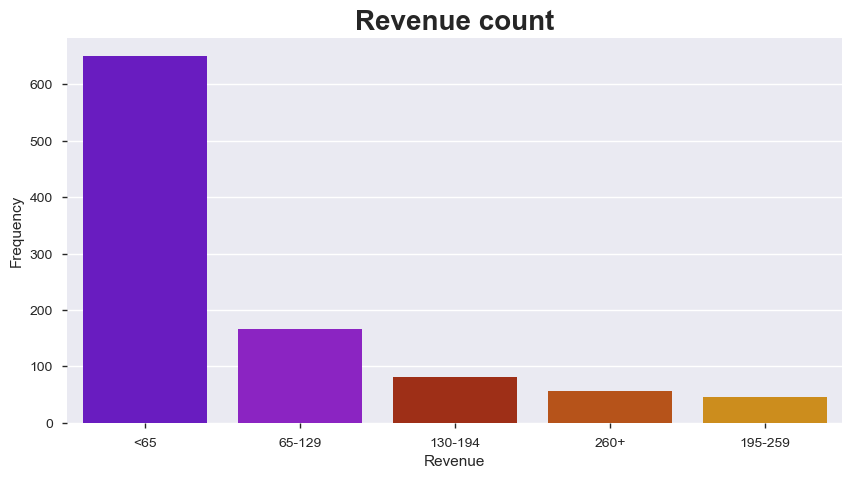

In [24]:
plt.figure(figsize=(10,5))
sns.countplot('revenue_cat',data = nmovds, order = nmovds['revenue_cat'].value_counts().index,palette="gnuplot")
plt.title("Revenue count",fontsize=20,fontweight="bold")
plt.ylabel("Frequency")
plt.xlabel("Revenue")
plt.show()

__650 (65%)__ movies __revenue__ is under __65M__.

### Genre and revenue

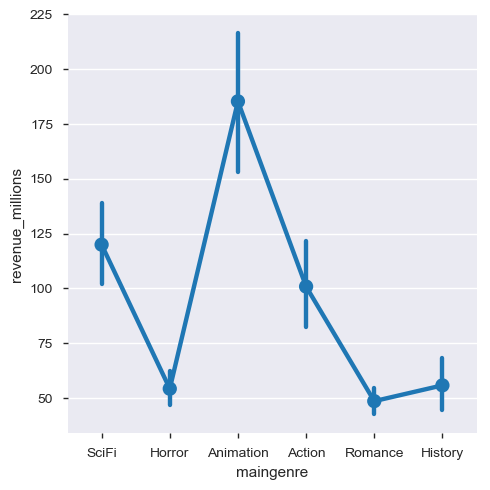

In [25]:
sns.catplot('maingenre','revenue_millions',kind='point',data=nmovds)
plt.show()

__Animation__ movies has the __highest revenue__.  Being the least in number with highest revenue, leads us to analyse Animation genre further.  So it is important to know the animation movies count under the revenue categorisation. 

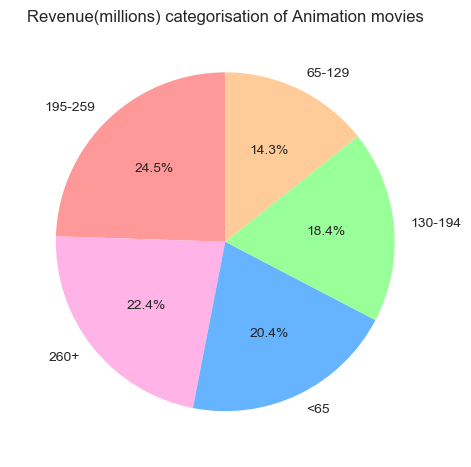

In [26]:
anim_rev = [12,11,10,9,7]
anim_name = ['195-259','260+','<65','130-194','65-129'] 
colors = ['#ff9999','#ffb3e6','#66b3ff','#99ff99','#ffcc99','#c2c2f0']

plt.pie(anim_rev, labels=anim_name, colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Revenue(millions) categorisation of Animation movies')
plt.show()

In [27]:
#Counting the animation movies under each revenue category
nmovds[nmovds['maingenre']=='Animation']['revenue_cat'].value_counts()

195-259    12
260+       11
<65        10
130-194     9
65-129      7
Name: revenue_cat, dtype: int64

In [28]:
#checking the revenue made by top 2 revenue categories of genre Animation
anim_top_rev = nmovds[(nmovds['maingenre']=='Animation') & (nmovds['revenue_millions'] > 195.00)]['revenue_millions'].sum() / nmovds[(nmovds['maingenre']=='Animation') ]['revenue_millions'].sum() * 100
print('The top 2 Revenue category of Animation movies make {} % revenue of Genre Animation'.format(anim_top_rev))

The top 2 Revenue category of Animation movies make 72.96297560293587 % revenue of Genre Animation


__46.9% movies__ have made __72.96% revenue__ of the genre __Animation__.  

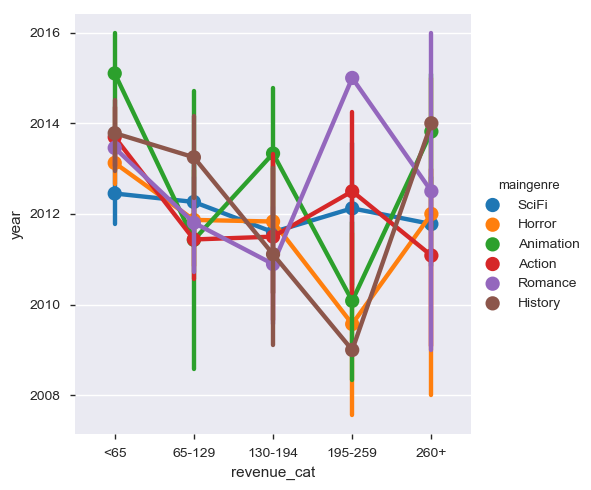

In [29]:
sns.catplot('revenue_cat','year',hue='maingenre',kind='point',data=nmovds)
plt.show()

__None__ of the __movies earned more than 260M__ in __2015-2016__.

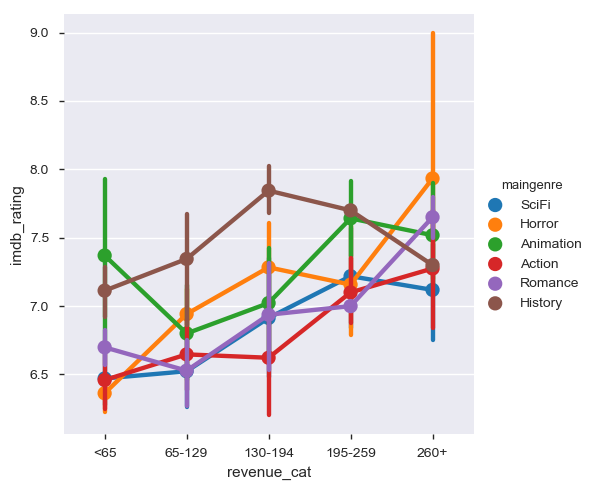

In [30]:
sns.catplot('revenue_cat','imdb_rating',hue='maingenre',kind='point',data=nmovds)
plt.show()

As the __imdb_rating increases the revenue increases__ except History genre(got a fall in the revenue)

### Rank & Revenue

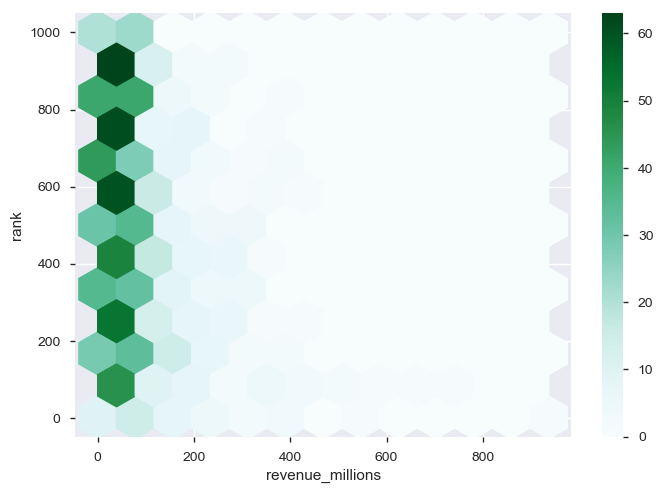

In [31]:
nmovds[nmovds['revenue_millions'] < 1000].plot.hexbin(x='revenue_millions',y='rank',gridsize=12)

There is not much that can be drawn from the above.

### Genre wise revenue

In [32]:
print("Total Revenue for all the 1000 movies: " , nmovds['revenue_millions'].sum())

Total Revenue for all the 1000 movies:  78480.04000000001


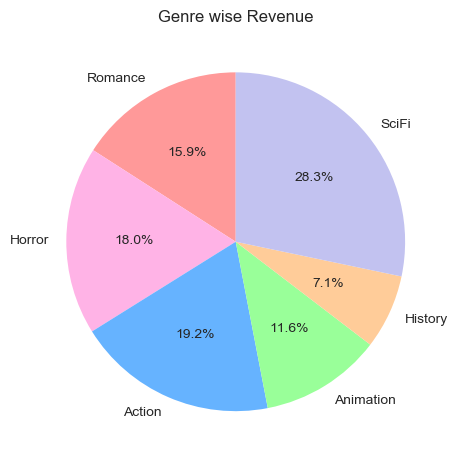

In [33]:
gen_rev = [nmovds[nmovds.maingenre == 'Romance']['revenue_millions'].sum(), nmovds[nmovds.maingenre == 'Horror']['revenue_millions'].sum(),nmovds[nmovds.maingenre == 'Action']['revenue_millions'].sum(),nmovds[nmovds.maingenre == 'Animation']['revenue_millions'].sum(),nmovds[nmovds.maingenre == 'History']['revenue_millions'].sum(),nmovds[nmovds.maingenre == 'SciFi']['revenue_millions'].sum()]
gen_name = ['Romance','Horror','Action','Animation','History','SciFi']
colors = ['#ff9999','#ffb3e6','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
#'#c2c2f0','#ffb3e6', '#c2c2f0','#ffb3e6','#c2c2f0'
plt.pie(gen_rev, labels=gen_name, colors=colors, startangle=90, autopct='%.1f%%')
plt.title('Genre wise Revenue')
plt.show()


In [34]:
nmovds[nmovds['maingenre']=='History'].count()

rank                100
title               100
genre               100
description         100
director            100
actors              100
year                100
runtime_minutes     100
imdb_rating         100
votes               100
revenue_millions    100
maingenre           100
revenue_cat         100
dtype: int64

Per the __genre__ categorisation __'Horror'__ has the highest number of movies during this period, followed by __'Romance'__ and __'Action'__.
__History__ genre has made the __least revenue__ of the 100 movies. 

Text(0.5, 1.0, 'Revenue vs Genre')

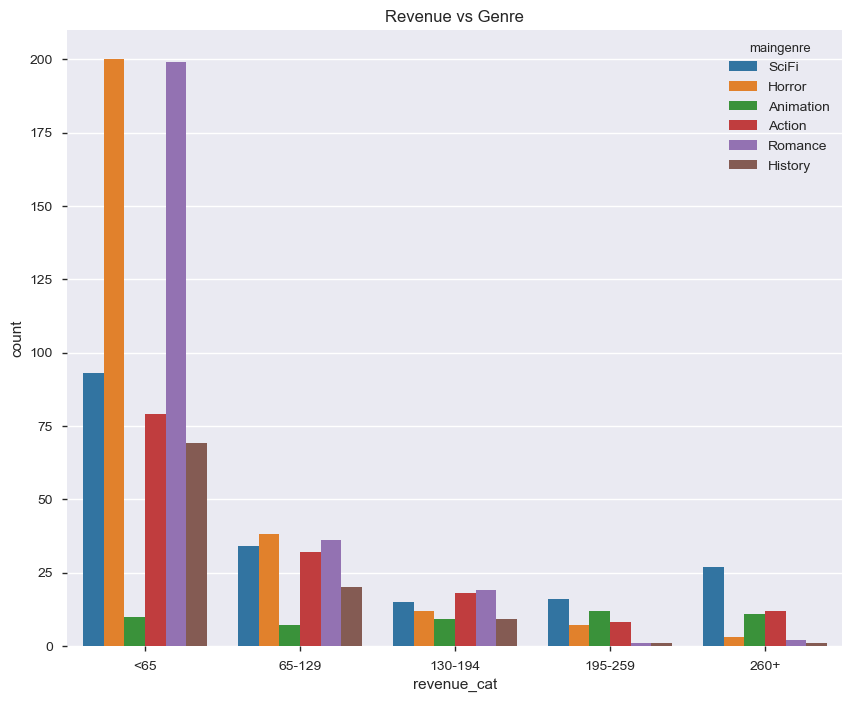

In [35]:
fig,ax =plt.subplots(figsize=(10,8))
sns.countplot(data = nmovds,x = 'revenue_cat', hue='maingenre')
plt.title('Revenue vs Genre')

### Runtime & Revenue

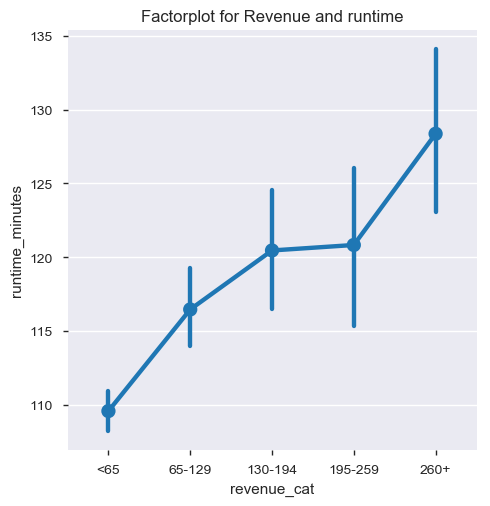

In [36]:
sns.catplot('revenue_cat','runtime_minutes', kind='point', data = nmovds)
plt.title('Factorplot for Revenue and runtime')
plt.show()

As the __runtime increases__ the __revenue increases__.
Movies with __125min__ runtime fall under the __260+ revenue__ bucket.

#### Comparing the runtime and revenue based on the genre.

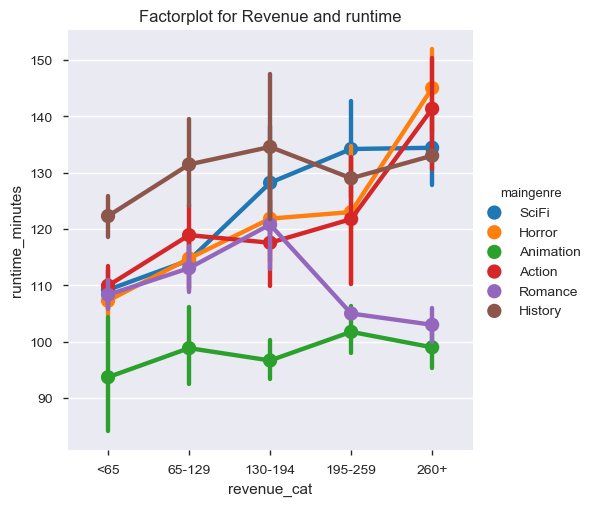

In [37]:
sns.catplot('revenue_cat','runtime_minutes', hue='maingenre', kind='point', data = nmovds)
plt.title('Factorplot for Revenue and runtime')
plt.show()

As __runtime increases__ the __reveneue increases__.
__Animation__ movies have got the __shortest__ runtime.  Also has the __upward trend__ in revenue.

### Segmenting Votes into 7 buckets

In [38]:
print('min:',movds['votes'].min())
print('max:',movds['votes'].max())
print('mean:',movds['votes'].mean())
print('median:',movds['votes'].median())
print('mode:',movds['votes'].mode())

min: 61
max: 1791916
mean: 169808.255
median: 110799.0
mode: 0      291
1     1427
2    97141
dtype: int64


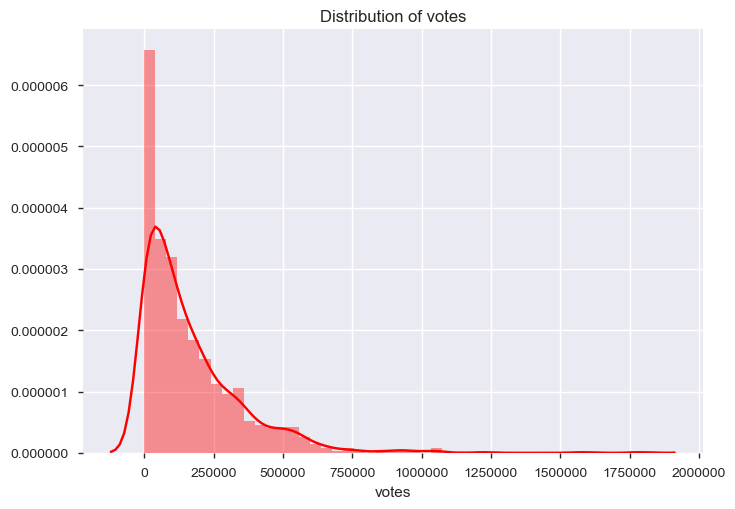

In [39]:
sns.distplot(nmovds['votes'],color ='r')
plt.title('Distribution of votes')
plt.show()

Per the above graph, __Votes__ is __highly skewed__.  Cateogising the votes into 7 groups.

In [40]:
nmovds['votes_cat'] = pd.cut(nmovds['votes'].dropna(),
                               [0,100000,200000,300000,400000,500000,600000,700000,1800000],
                               labels=['1','2','3','4','6','7','8','9'],include_lowest=True)
nmovds.tail(2)

,rank,title,genre,description,director,actors,year,runtime_minutes,imdb_rating,votes,revenue_millions,maingenre,revenue_cat,votes_cat
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,47.985,Action,<65,1
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.640,Romance,<65,1


Text(0.5, 1.0, 'Votes Vs Revenue')

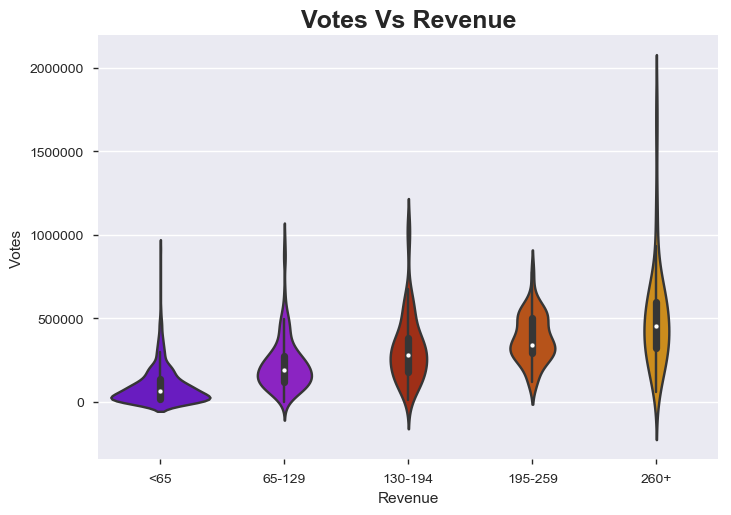

In [41]:
ax = sns.violinplot(x="revenue_cat", y="votes", palette="gnuplot", data=nmovds)
plt.xlabel("Revenue")
plt.ylabel("Votes")
plt.title("Votes Vs Revenue", fontsize=18, fontweight="bold")

Vote has got minimal influence on the revenue.

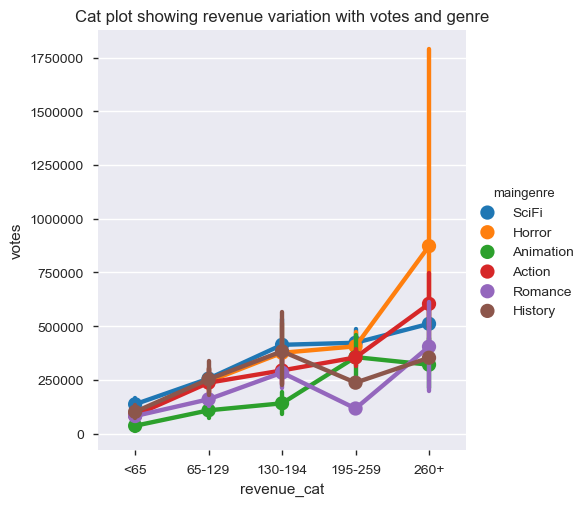

In [42]:
sns.catplot('revenue_cat','votes', hue= 'maingenre', kind='point', data= nmovds)
plt.title('Cat plot showing revenue variation with votes and genre')
plt.show()

When the revenue and the votes alone were plotted, votes had a minimal influence on the revenue.  However, genre wise the votes do have great impact on the revenue.
There is an __upward trend__ in the __revenue__ based on the __votes__ and __genre__.

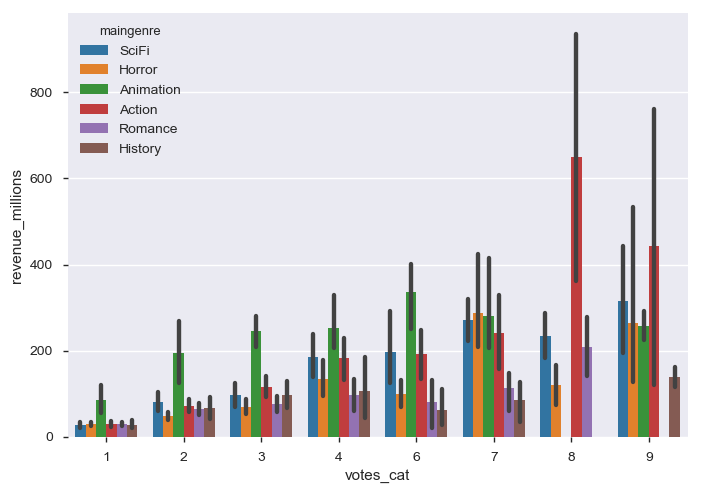

In [43]:
sns.barplot(x = "votes_cat", y = "revenue_millions", hue = "maingenre", data = nmovds)
plt.show()

As __votes increase__, the __revenue increases__.
__Genre-Action__ is making the __most revenue__.
__No Romance__ movie has been voted __more__ than 700000.
__Votes positively influencing__ the __revenue__, is crystal clear.

### Correlation

Text(0.5, 1.0, 'Correlation between features')

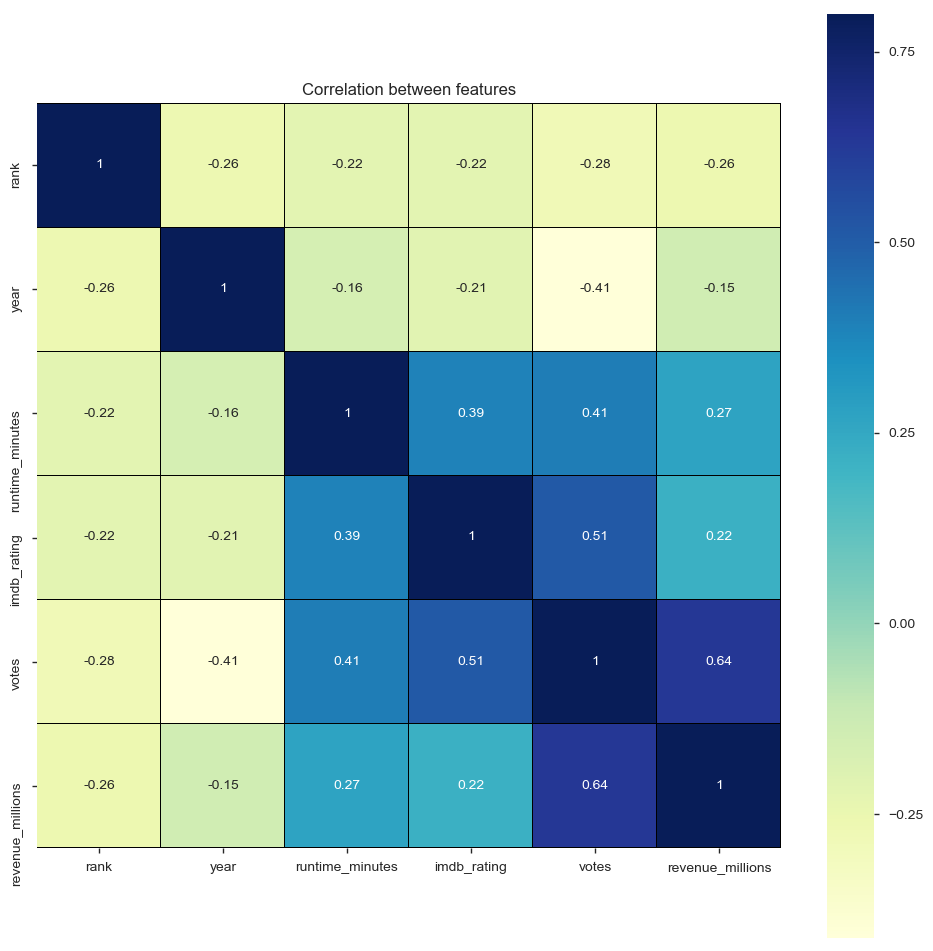

In [44]:
corr = nmovds.corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr,vmax=.8,linewidth=.01, square = True, annot = True,cmap='YlGnBu',linecolor ='black')
plt.title('Correlation between features')

__Rank__ and __year__ are __negatively corelated__ with __revenue__.
__Votes, imdb_rating__ and __runtime__ are positively correlated with __revenue__.

### Conclusion

 - From the total of 1000 movies, __65%__ movies __revenue__ is __under 65M__.

 - Per the __genre__ categorisation __'Horror'__ has the highest number of movies during this period, followed by __'Romance'__ and __'Action'__.

 - Genre __'Animation'__ being the __least__ in number __(4.9%)__ is the only genre to have an __upward trend__ with the __revenue__ throughout. __46.9% movies__ have made __72.96% revenue__ of the genre __Animation__.
 
 - __None__ of the __movies earned more than 260M__ in __2015-2016__. The probability is either the entertainment world couldn't grab people's attention from other attractions or no good movies were made.

 - __IMDB__ rating is more prominent.  This results in __more viewers__, __voting__ and thus the __Revenue__.

 - The analysis helps us conclude that __votes, IMDB rating and Genre__ were primarily and __runtime__ secondarily impacting the revenue.